# Week 7 Exercise

In [176]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif

## Part 1

In [177]:
# load data and make sure it loads right
housing = pd.read_csv("train.csv")
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [178]:
# drop id column
housing.drop("Id", axis=1, inplace=True)

In [179]:
# drop columns with more than 40% missing values
housing.drop(housing.columns[housing.isnull().mean()>.4], axis=1, inplace=True)
housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [180]:
# get only numeric columns
numeric_col = housing.select_dtypes(include='number').columns

In [181]:
# fill numeric columns
housing[numeric_col] = housing[numeric_col].fillna(housing[numeric_col].median())

In [182]:
# get only categorical columns
cat_col = housing.select_dtypes(include="object").columns

In [183]:
# fill categorical columns
housing[cat_col] = housing[cat_col].fillna(housing[cat_col].mode())

In [184]:
# dummy variable categorical
dummies = pd.get_dummies(housing[cat_col])

In [185]:
# add dummies to df
housing2 = pd.concat([housing.select_dtypes(include="number"), dummies], axis=1)
housing2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [186]:
# set features vs target
features = housing2.loc[:, housing2.columns != "SalePrice"]
target = housing2.SalePrice

In [187]:
# split set
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, test_size=.2, random_state=1)

In [188]:
# linear regression on the thing
regression = LinearRegression()
model = regression.fit(feat_train, target_train)

In [189]:
# predictions
predictions = model.predict(feat_test)

In [190]:
# r2 and RMSE of model
r2 = r2_score(target_test, predictions)
rmse = mean_squared_error(target_test, predictions, squared=False)
print(f"R Squared: {r2}\nRMSE: {rmse}")

R Squared: 0.8712385939275782
RMSE: 30303.779585890636


In [191]:
scaler2 = StandardScaler()
feat_scaled = scaler2.fit_transform(feat_train)

In [192]:
feat_test_scaled = scaler2.transform(feat_test)

In [193]:
# fit and transforming PCA
pca = PCA(n_components=.9)
features_pca = pca.fit_transform(feat_scaled)

In [194]:
# How many features
print(f"Reduced number of features: {features_pca.shape[1]}")

Reduced number of features: 139


In [195]:
# transform test feats
feat_test_pca = pca.transform(feat_test_scaled)

In [196]:
# linear regression with PCA
regression2 = LinearRegression()
model2 = regression2.fit(features_pca, target_train)

In [197]:
# predictions
predictions2 = model2.predict(feat_test_pca)

In [198]:
# r2 and RMSE of model
r22 = r2_score(target_test, predictions2)
rmse2 = mean_squared_error(target_test, predictions2, squared=False)
print(f"R Squared: {r22}\nRMSE: {rmse2}")

R Squared: 0.8373184990630775
RMSE: 34062.22619104943


In [199]:
# min max scaling
minmax = MinMaxScaler(feature_range=(0,1))
scaled_feat = minmax.fit_transform(feat_train)

In [200]:
# threshold stuff
tresholder = VarianceThreshold(threshold=.1)
feat_high_variance = tresholder.fit_transform(scaled_feat)

In [201]:
# min max scaling
scaled_test_feat = minmax.transform(feat_test)

In [202]:
feat_test_high = tresholder.transform(scaled_test_feat)

In [203]:
# step 7
regression3 = LinearRegression()
model3 = regression3.fit(feat_high_variance, target_train)

In [204]:
predictions3 = model3.predict(feat_test_high)

In [205]:
# r2 and RMSE of model
r23 = r2_score(target_test, predictions3)
rmse3 = mean_squared_error(target_test, predictions3, squared=False)
print(f"R Squared: {r23}\nRMSE: {rmse3}")

R Squared: 0.5753223910429255
RMSE: 55034.32256655693


Each model tries a different way of reducing the dimensions. The first takes only those features that still lets data maintain 90% of its data. Fitting this regression model actually didn't improve the R squared by much. In the third model we used thresholding to remove features with a low variance. This method was the least accurate out of all the models, with an rsquared of only 57% and an RMSE over 50,000. It would seem in this case that perhaps a different method of dimension reducing is needed since neither model proved to to improve the model much at all.

## Part 2

In [206]:
# load data set
mushrooms = pd.read_csv("mushrooms.csv")
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [207]:
# dummies
mushrooms2 = pd.get_dummies(mushrooms)
mushrooms2

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [208]:
features2 = mushrooms2.iloc[:, 2:]
target2 = mushrooms2.class_e

In [209]:
# test train split
feat_train2, feat_test2, target_train2, target_test2 = train_test_split(
    features2, target2, test_size = .2, random_state=0 )

In [210]:
# fit decision tree
decisiontree = DecisionTreeClassifier(random_state=0)
model_tree = decisiontree.fit(feat_train2, target_train2)

In [211]:
predictions4 = model_tree.predict(feat_test2)

In [212]:
# accuracy score
acc = accuracy_score(target_test2, predictions4)
acc

1.0

In [213]:
# confusion matrix
conf_mat = confusion_matrix(target_test2, predictions4)
conf_mat

array([[773,   0],
       [  0, 852]], dtype=int64)

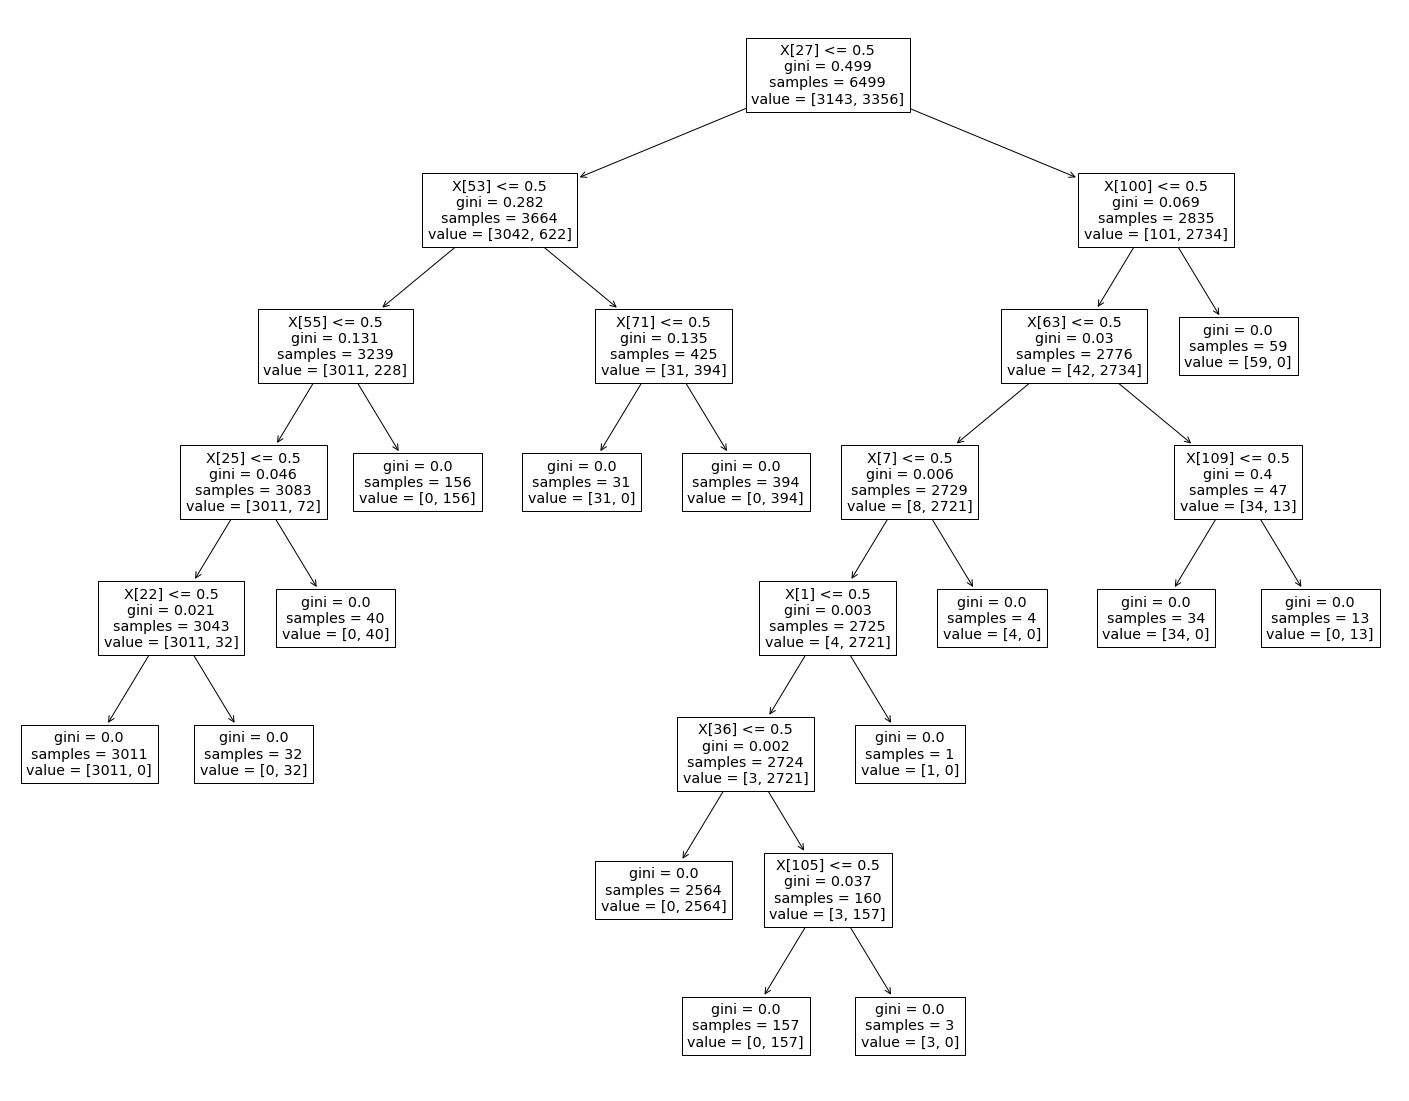

In [214]:
# visualizing tree
plt.figure(figsize=(25, 20))
tree.plot_tree(decisiontree)
plt.show()

In [215]:
chi2_selector = SelectKBest(chi2, k=2)

In [216]:
features_kbest = chi2_selector.fit_transform(feat_train2, target_train2)

In [217]:
feat_train2

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
7434,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7725,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
783,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1928,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
7466,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3264,0,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1653,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2607,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [218]:
# Get columns to keep and create new dataframe with those only
cols2 = chi2_selector.get_support(indices=True)
features_df_new = feat_train2.iloc[:,cols2]
test_features_df_new = feat_test2.iloc[:,cols2]
list(features_df_new.columns)

['odor_f', 'odor_n']

In [219]:
# fit decision tree
decisiontree2 = DecisionTreeClassifier(random_state=1)
model_tree2 = decisiontree.fit(features_df_new, target_train2)

In [220]:
predictions5 = model_tree2.predict(test_features_df_new)

In [221]:
# accuracy score
acc2 = accuracy_score(target_test2, predictions5)
acc2

0.8787692307692307

In [222]:
# confusion matrix
conf_mat2 = confusion_matrix(target_test2, predictions5)
conf_mat2

array([[754,  19],
       [178, 674]], dtype=int64)

The accuracy in the second model is lower than the first by about 13%. We can see that there are a number of false positives in the confusion matrix. However, we have shown that we can maintain a relatively high level of accuracy while severely reducing the amount of features in our model. This makes the second model much more efficient and possibly less prone to overfitting than the first.